#**Simple Residual Classifier**


In this notebook, we will train and test a simple residual classifier on MNIST dataset. Architecture of the network is as follow:

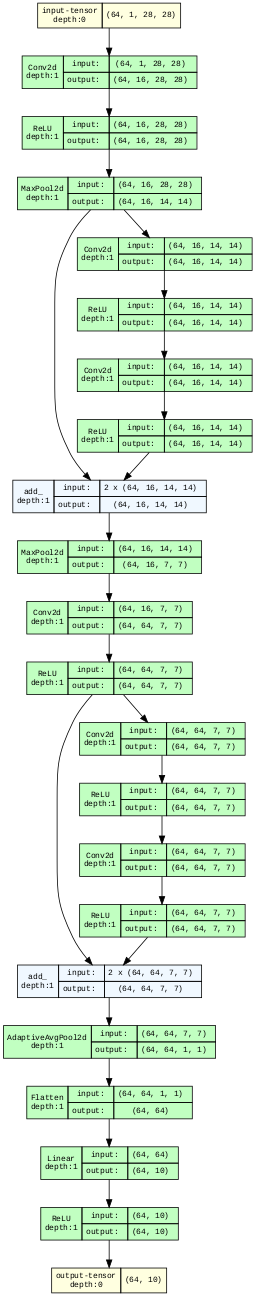

In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, datasets

from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from torch.nn import Conv2d

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

To load the dataset and pass it to the network, we use Pytorch built in dataloader:

In [2]:
transformation = transforms.Compose([transforms.PILToTensor(),transforms.ConvertImageDtype(torch.float),transforms.Normalize(mean=[0.1307],std=[0.3081])])
mnist_data = datasets.MNIST(root='data/', download=True, transform=transformation)
train_data, valid_data = random_split(mnist_data, [50000, 10000]) 
train_loader = DataLoader(train_data,batch_size=16,shuffle=True)
val_loader = DataLoader(valid_data,batch_size=16,shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Now we can create our model and perform the training:

In [3]:
from SimpleResidualClassifier import SimpleResidualClassifier
model = SimpleResidualClassifier(1).to(device)
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters())

# training the model
num_epochs = 20
losses=[]
accurracy=[]
for epoch in range(num_epochs):
    for images, labels in train_loader: 
        images,labels=images.to(device),labels.to(device) 
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

    with torch.no_grad():
        model.eval()
        N = 0
        tot_loss, correct = 0.0, 0.0

        for images, labels in val_loader:
            images,labels=images.to(device),labels.to(device)
            outputs = model(images)
            N += images.shape[0]

            tot_loss += images.shape[0] * criterion(outputs, labels).item()

            predicted_targets = outputs.argmax(dim=1)
            correct += (predicted_targets == labels).sum().item()
        losses.append(tot_loss/N)
        accurracy.append(correct/N)
        print('Epoch ',epoch,'==> Validation loss: ',tot_loss/N,', Accuracy: ',correct/N)



Epoch  0 ==> Validation loss:  1.427065967321396 , Accuracy:  0.3967
Epoch  1 ==> Validation loss:  1.4061359512329101 , Accuracy:  0.4003
Epoch  2 ==> Validation loss:  1.4200581273078918 , Accuracy:  0.398
Epoch  3 ==> Validation loss:  1.4060803683280945 , Accuracy:  0.4
Epoch  4 ==> Validation loss:  1.3916149354457856 , Accuracy:  0.4024
Epoch  5 ==> Validation loss:  1.3932661054611206 , Accuracy:  0.4024
Epoch  6 ==> Validation loss:  1.3909851565361022 , Accuracy:  0.4033
Epoch  7 ==> Validation loss:  1.3900016227722167 , Accuracy:  0.4026
Epoch  8 ==> Validation loss:  1.3892117315292358 , Accuracy:  0.4025
Epoch  9 ==> Validation loss:  1.3953837010383605 , Accuracy:  0.4014
Epoch  10 ==> Validation loss:  1.3906121395111084 , Accuracy:  0.4013
Epoch  11 ==> Validation loss:  1.3968946866989136 , Accuracy:  0.4028
Epoch  12 ==> Validation loss:  1.3903108143806457 , Accuracy:  0.402
Epoch  13 ==> Validation loss:  1.398613235473633 , Accuracy:  0.4015
Epoch  14 ==> Validatio

We can also plot loss and accuracy with respect to epoch

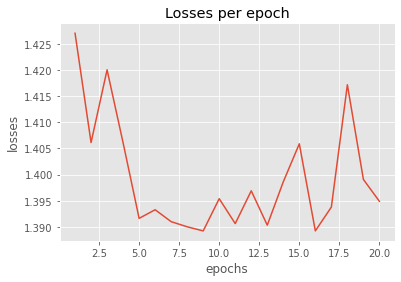

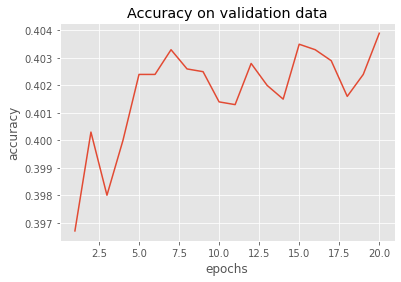

In [4]:
plt.xlabel('epochs')
plt.ylabel('losses')
plt.title('Losses per epoch')
plt.plot(np.arange(1,21),losses)
plt.show()

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy on validation data')
plt.plot(np.arange(1,21),accurracy)
plt.show()

Testing the model on Test data:

In [5]:
test_data = datasets.MNIST(root='data/', download=True, transform=transformation, train=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

y_true=np.zeros(0).astype(int)
y_pred=np.zeros(0).astype(int)

with torch.no_grad():
        model.eval()
        N = 0
        tot_loss, correct = 0.0, 0.0

        for images, labels in test_loader:
            images,labels=images.to(device),labels.to(device)
            outputs = model(images)
            N += images.shape[0]
            tot_loss += images.shape[0] * criterion(outputs, labels).item()
            predicted_targets = outputs.argmax(dim=1)
            y_true=np.append(y_true,labels.cpu().numpy(),axis=0)
            y_pred=np.append(y_pred,predicted_targets.cpu().numpy(),axis=0)
            correct += (predicted_targets == labels).sum().item()
        test_loss=tot_loss/N
        test_acc=correct/N

print('Test Error: ',test_loss)
print('Test Accuracy: ',test_acc)

Test Error:  1.395899730682373
Test Accuracy:  0.4021
